# Final Presentation

Friday, March 17th, 2022.
Luis David Vega Toral.
A00571517.
IN2039.102

Database used in this document:

Museums in the United States. Retrieved from https://www.kaggle.com/datasets/imls/museum-directory/download

## Dataset

In [35]:
#%ls

## Libraries to use:

In [36]:
#pip install matplotlib 

In [37]:
#pip install xlrd

In [38]:
#pip install seaborn

In [39]:
#pip install openpyxl

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Opening the data

In [8]:
path = 'museums.csv'
df = pd.read_csv(path, low_memory=False)
df.head(2)

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,61.16890,-149.76708,4.0,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0


## Description of the Dataset

This is a dataset that contains information about the museums in the United States of America, such as their location, income, etc.

## Description of the Variables

`Museum Name` is a categorical variable that represents the name of the museum.

`Museum Type` is a categorical variable that represents the type of museum.

`City (Administrative Location)` is a categorical variable that represents in which city the museum is located.

`State (Administrative Location)` is a categorical variable that represents the state in which the museum is located.

`Income` is a numerical variable that represents the income of the museum.

`Revenue` is a numerical variable that represents th revenue of the museum.

## Analyzing the Data

This dataset displays the income, revenue, and location of museums in the United States, as well as the type of museum that they are, which can be very interesting to analyze in order to discover whether these factors present a tendency or not according to variables of interest (like income vs. museum type, revenue vs. location, etc.).

## 1. How many museums are in the United States and what kind of museum are they?

In [40]:
#df.columns

In [10]:
m_type = df.groupby(['Museum Type']).size()
m_type = m_type.to_frame()
m_type = m_type.rename(columns= {0: 'Total'})
m_type

,Total
Museum Type,
"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",1484
ART MUSEUM,3241
CHILDREN'S MUSEUM,512
GENERAL MUSEUM,8699
HISTORIC PRESERVATION,14861
HISTORY MUSEUM,2284
NATURAL HISTORY MUSEUM,346
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,1081
"ZOO, AQUARIUM, OR WILDLIFE CONSERVATION",564


In [11]:
m_type['Countzz'] = (m_type.iloc[:, -1]/(m_type.iloc[:,-1]))
m_type

,Total,Countzz
Museum Type,,
"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",1484,1.0
ART MUSEUM,3241,1.0
CHILDREN'S MUSEUM,512,1.0
GENERAL MUSEUM,8699,1.0
HISTORIC PRESERVATION,14861,1.0
HISTORY MUSEUM,2284,1.0
NATURAL HISTORY MUSEUM,346,1.0
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,1081,1.0
"ZOO, AQUARIUM, OR WILDLIFE CONSERVATION",564,1.0


In [12]:
m_type4 = m_type
m_type4 = m_type4.groupby(['Countzz']).size()
m_type4 = m_type4.to_frame()
m_type4

,0
Countzz,
1.0,9


In [13]:
m_type2 = df.groupby(['Museum Name']).size()
m_type2 = m_type2.to_frame()
#m_type2 = m_type2.rename(columns= {0: 'Total'})
m_type2

,0
Museum Name,
1000 ISLANDS MUSEUMS,1
100TH MERIDIAN MUSEUM,2
102ND INFANTRY REGIMENT MUSEUM,1
103RD OHIO VOLUNTEER INFANTRY CIVIL WAR MUSEUM,1
1078 GALLERY,1
...,...
ZUHL MUSEUM,1
ZUMBROTA AREA HISTORICAL SOCIETY,1
ZUNI HISTORICAL SOCIETY,1


In [14]:
m_type2['Total Museums'] = (1)
m_type2

,0,Total Museums
Museum Name,,
1000 ISLANDS MUSEUMS,1,1
100TH MERIDIAN MUSEUM,2,1
102ND INFANTRY REGIMENT MUSEUM,1,1
103RD OHIO VOLUNTEER INFANTRY CIVIL WAR MUSEUM,1,1
1078 GALLERY,1,1
...,...,...
ZUHL MUSEUM,1,1
ZUMBROTA AREA HISTORICAL SOCIETY,1,1
ZUNI HISTORICAL SOCIETY,1,1


In [15]:
m_type3 = m_type2
m_type3 = m_type3.groupby(['Total Museums']).size()
m_type3 = m_type3.to_frame()
m_type3

,0
Total Museums,
1,31546


In [16]:
m_type4 = m_type
m_type4 = m_type4.groupby(['Countzz']).size()
m_type4 = m_type4.to_frame()
m_type4

,0
Countzz,
1.0,9


### Conclusion:

#### There are 31,546 museums in the United States and there are 9 types of museums.

## 2. Is there a relation between the location of a museum and the income?

In [41]:
#df.columns

In [18]:
myPivot = pd.pivot_table(df,
                         index = ['State (Administrative Location)'],
                         values= ['Income'],
                         aggfunc = ['mean'],
                         #aggfunc en python average es el default en pivot table y en excel es la suma
                        
                        )

pd.set_option('display.max_rows',50)

myPivot

,mean
,Income
State (Administrative Location),
AK,1.127787e+06
AL,3.029768e+06
AR,7.291168e+06
AZ,3.148996e+08
CA,8.586287e+07
...,...
VT,4.476041e+06
WA,6.763119e+06


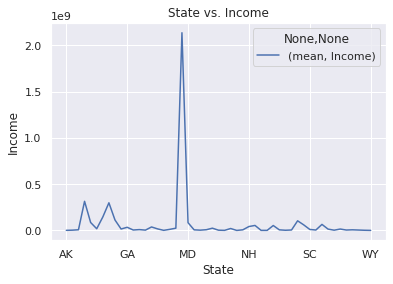

<Figure size 1440x1440 with 0 Axes>

In [19]:
sns.set()  # use Seaborn styles
df.pivot_table(index = ['State (Administrative Location)'],
                         values= ['Income'],
                         aggfunc = ['mean'],).plot()

plt.title('State vs. Income')
plt.xlabel('State')
plt.ylabel('Income')
plt.figure(figsize=(20, 20))

plt.show()

### Conclusion:

#### Generally speaking, it doesn't appear to exist a relation between location and income, however, museums in the state of MD appear to have by far a higher income than in any other state.

## 3. What is the mean revenue of Art Museums in the US?

In [20]:
#df.columns

In [21]:
myPivot = pd.pivot_table(df,
                         index = ['Museum Type'],
                         values= ['Revenue'],
                         aggfunc = ['mean'],
                         #aggfunc en python average es el default en pivot table y en excel es la suma
                        
                        )

pd.set_option('display.max_rows',50)

myPivot

,mean
,Revenue
Museum Type,
"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",7.787922e+07
ART MUSEUM,1.007874e+08
CHILDREN'S MUSEUM,1.355364e+06
GENERAL MUSEUM,2.740284e+07
HISTORIC PRESERVATION,2.035602e+06
HISTORY MUSEUM,9.402442e+06
NATURAL HISTORY MUSEUM,8.549832e+07
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,1.143093e+08


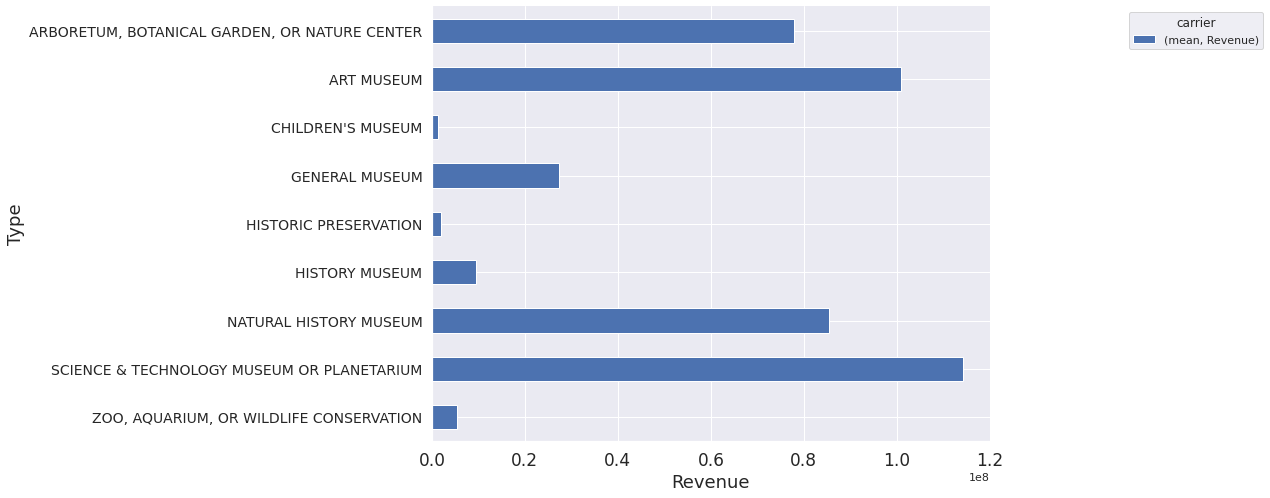

In [22]:
from matplotlib import ticker
ax = myPivot.plot(
     kind='barh', stacked=True,
     title='',
    figsize = (10,8),
 )

ax.invert_yaxis()

# formatting

ax.set(xlabel='Revenue', ylabel='Type')
ax.legend(title='')

# shift legend to not cover the bars

ax.legend(title='carrier', bbox_to_anchor=(1.5 ,1), loc='upper right') 

for spine in ['top', 'right']:
     ax.spines[spine].set_visible(False)
        
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 14)

plt.xlabel('Revenue', fontweight = 'regular', fontsize = 18, horizontalalignment = 'center')
plt.ylabel('Type', fontweight = 'regular', fontsize = 18, horizontalalignment = 'center')

plt.show()

### Conclusion:

#### Art Museums in the US have a mean revenue of $1.007874e+08 USD.

## 4. What is the overall proportion of museum types in the US?

In [23]:
counts = df['Museum Type'].value_counts()
counts = counts.to_frame()
counts['%'] = counts.iloc[:, :]/counts.loc[:, 'Museum Type'].sum(axis = 0)*100
#counts

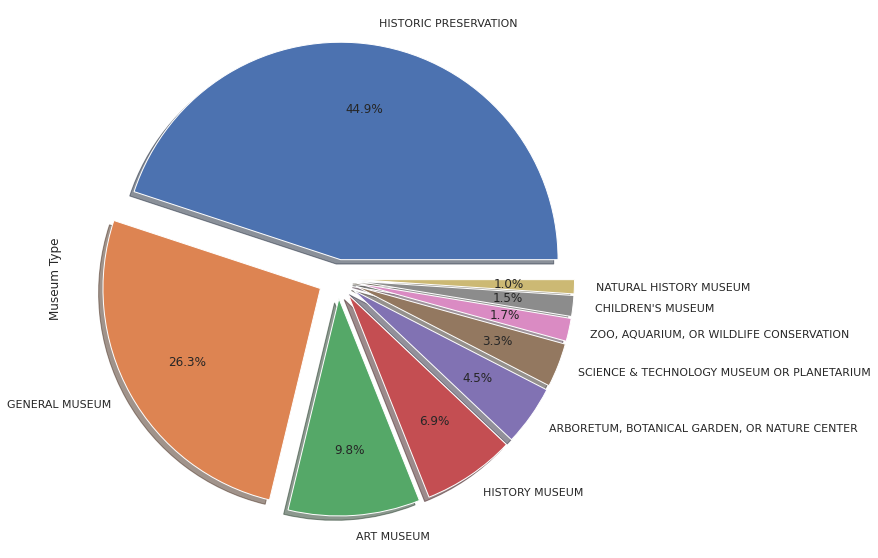

In [24]:
explode_list = [0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]

counts['Museum Type'].plot(
    kind = 'pie',
    #title = 'Museum Type',
    figsize = (20,10),
    autopct = '%1.1f%%',
    explode = explode_list,
    shadow = True,
    pctdistance = 0.7,
)

plt.show()

### Conclusion:

#### The museum types with more presence in the US are "HISTORIC PRESERVATION" (44.9%) and "GENERAL MUSEUM" (26.3%).

## 5. Is there a relation between `Income` and `Revenue` ?

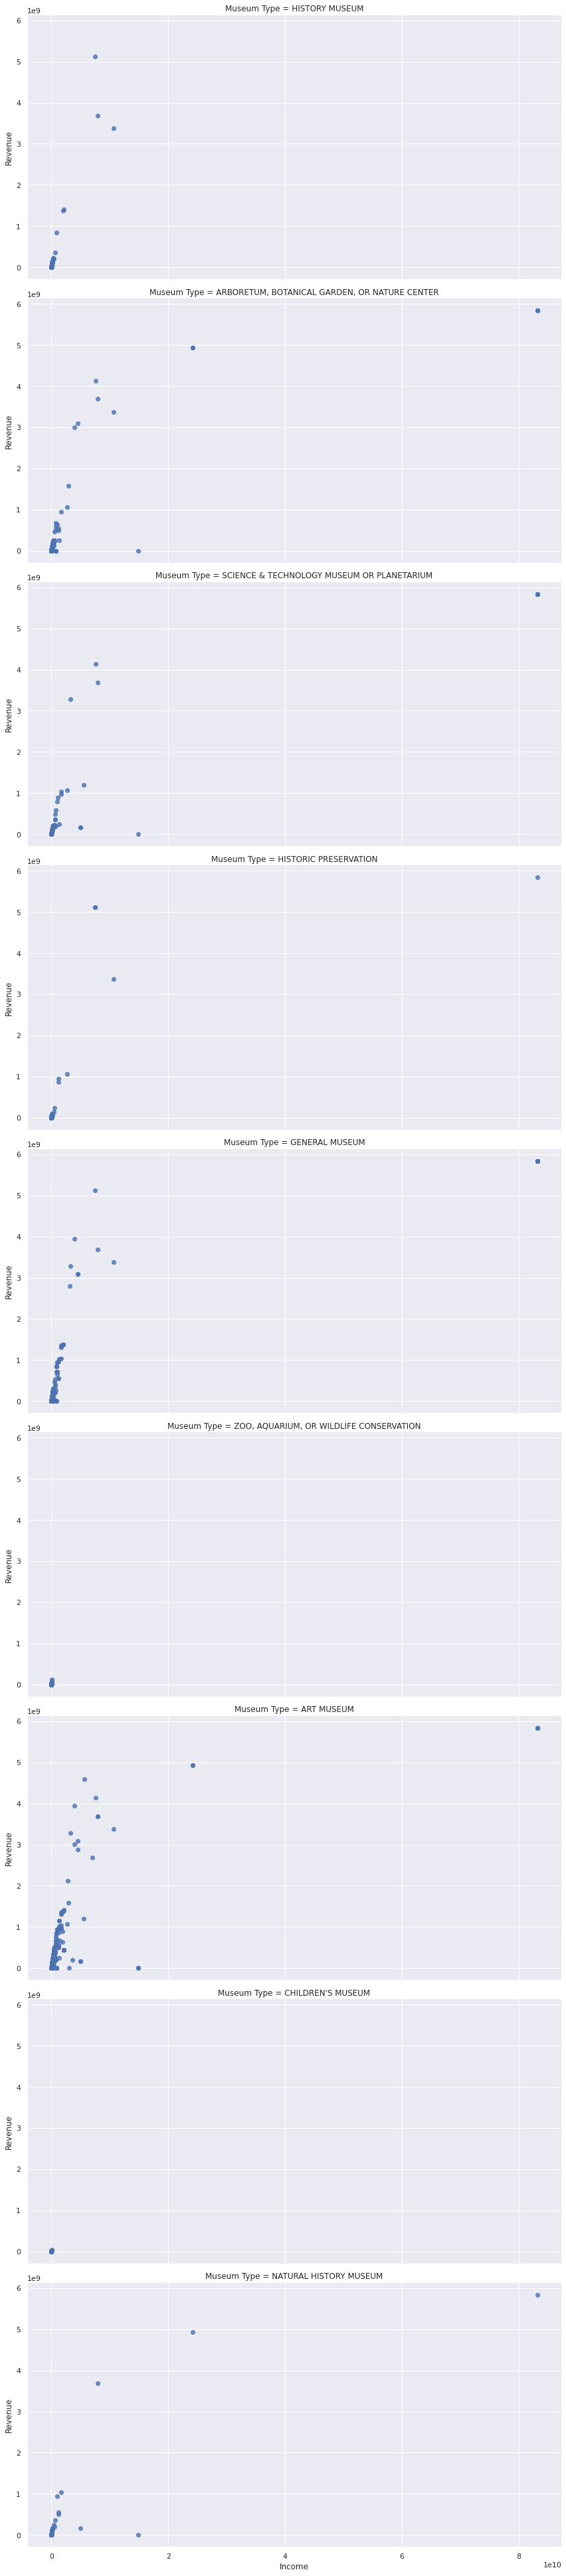

In [25]:
sns.lmplot(x = 'Income',
           y = 'Revenue',
           data = df,
           fit_reg = False,
           #hue = 'Museum Type',
           height=6, 
           aspect=2,
           col="Museum Type",
           col_wrap=1, 
           
          )

plt.show()

### Conclusion:

#### It appears that generally speaking, museums aren't very profitable, for their income and revenue tend to have very similar values.

## 6. Is there a relation between `Tax Period` and `Revenue`?

In [34]:
#df.columns

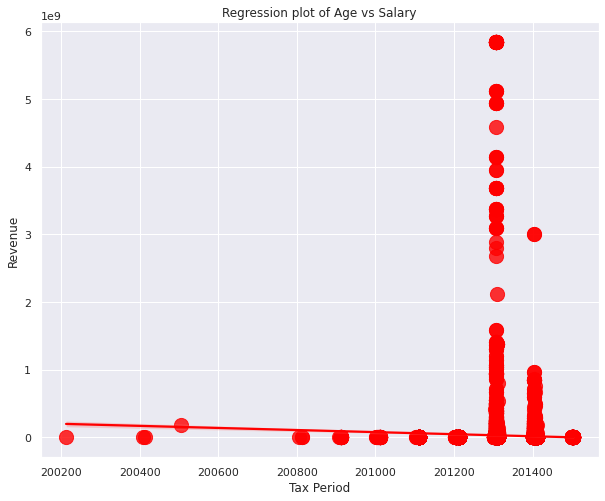

In [33]:
plt.figure(figsize = (10,8))
ax = sns.regplot(x = 'Tax Period',
                 y = 'Revenue',
                 data = df,
                 color = 'red',
                 scatter_kws = {'s':200}
                )

ax.set(xlabel = 'Tax Period',
      ylabel = 'Revenue',
      
      )


ax.set_title('Regression plot of Age vs Salary')

plt.show()

### Conclusion:

#### It appears that throughout the different Tax Periods, Revenue tends to fall, with exception of the last periods, where Revenue skyrocketed.

 
 
## Problems I have faced during this activity:
 
Because the database has many categorical variables (in fact, it only has 2 "useful" numerical variables), I had to get creative in order to graph with Python the various queries I developed for this activity, yet I think this was an interesting opportunity to learn more about graphing and analyzing categorical data with numerical values (such as counting the data).

## References

* https://opendatascience.com/how-to-pivot-and-plot-data-with-pandas/
* https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html